# Salary Prediction

After collecting data from job postings listed on Indeed.com, we can start on the modeling part to predict salaries based on differnt features. but before that, we need to take a closer look at the data to make sure that it is clean and filtered enough to work with. 

### 1. Cleaning and exploring data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the Dataset
Analyst = pd.read_csv('result_Data_Analyst.csv')


In [3]:
Analyst.shape

(2515, 6)

In [4]:
Analyst.head()

,Unnamed: 0,Company,Level,Location,Salary,Title
0,0,The HSC Health Care System,entry_level,"Washington, DC",60000.0,Junior Data Analyst
1,1,Addison Group,entry_level,"Washington, DC 20003 (Capitol Hill area)",60000.0,Reports Analyst
2,2,PCAOB,entry_level,"Washington, DC",60000.0,Research Analyst
3,3,NSD,entry_level,"Washington, DC 20036 (Downtown area)",60000.0,Data Analyst
4,4,Guidehouse,entry_level,"Washington, DC",60000.0,Data Analyst - Experienced Associate


In [5]:
#Seperating city and state 
Analyst['City'] = Analyst.Location.str.split(',',expand=True)[0]
Analyst["State"] = Analyst.Location.str.split(',',expand=True)[1]

In [6]:
#putting Nan for united Satet
Analyst["City"]= Analyst["City"].replace('',np.nan)

#dropping duplicate rows
Analyst = Analyst.drop_duplicates()

#dropping NaN values
Analyst = Analyst.dropna()

Analyst.dtypes

Unnamed: 0      int64
Company        object
Level          object
Location       object
Salary        float64
Title          object
City           object
State          object
dtype: object

In [7]:
Analyst.shape

(2250, 8)

In [8]:
#saving the new data
Analyst.to_csv('Analyst.csv',encoding='utf-8')

In [9]:
#median salary
Analyst_med= Analyst.median()
Analyst_med

Unnamed: 0       24.5
Salary        75000.0
dtype: float64

In [10]:
#median salary of each location
Analyst_loc_med = Analyst.groupby('Location').median()
Analyst_loc_med

,Unnamed: 0,Salary
Location,,
"Alameda, CA",34.5,77500.0
"Alexandria, VA",31.0,75000.0
"Alexandria, VA 22311 (Alexandria Wrest area)",39.0,75000.0
"Alexandria, VA 22314 (Southwest Quadrant area)",40.0,85000.0
"Andrews AFB, MD",41.0,72500.0
"Annapolis Junction, MD",32.0,100000.0
"Annapolis, MD 21403",6.0,60000.0
"Arlington, VA",32.0,80000.0
"Arlington, VA 22201 (Lyon Village area)",19.5,70000.0



**We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)**

Regression could be used for a task like this, but since there is a fair amount of variance in job salaries, I treated this as a classification problem, with the goal of predicting whether a job salary would be above or below the median salary for a data scientist.

In [11]:
#classification based on median 
Analyst["Classify_salary"] = 0
Analyst["Classify_salary"][Analyst["Salary"]>= 75000.0] =1
Analyst.head()

C:\Users\shpir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,Company,Level,Location,Salary,Title,City,State,Classify_salary
0,0,The HSC Health Care System,entry_level,"Washington, DC",60000.0,Junior Data Analyst,Washington,DC,0
1,1,Addison Group,entry_level,"Washington, DC 20003 (Capitol Hill area)",60000.0,Reports Analyst,Washington,DC 20003 (Capitol Hill area),0
2,2,PCAOB,entry_level,"Washington, DC",60000.0,Research Analyst,Washington,DC,0
3,3,NSD,entry_level,"Washington, DC 20036 (Downtown area)",60000.0,Data Analyst,Washington,DC 20036 (Downtown area),0
4,4,Guidehouse,entry_level,"Washington, DC",60000.0,Data Analyst - Experienced Associate,Washington,DC,0


### 2. Categorical Features Distributions
Investigate the relation of each categorical feature with the salary class:

* Level
* location
* company 

Use a bar-chart to visualize the relative frequency of each of the elements in the group. Use two colors to distinguish between the low and high salary class.

#### 2.1. Level 

In [12]:
Analyst_dummies_level = pd.get_dummies(Analyst['Level'])
Analyst_dummies_level.columns

Index(['entry_level', 'mid_level', 'senior_level'], dtype='object')

In [13]:
Analyst_dummies_level.columns =  [u'Entry_level', u'Mid_level', u'Senior_level']


In [14]:
#adding the dummies_level to the dataset
Analyst = pd.concat([Analyst, Analyst_dummies_level], axis=1)

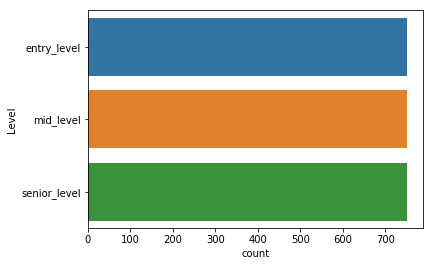

In [15]:
#plotting the total number of each level
sns.countplot(y='Level', data= Analyst)

#### 2.2 Location

In [16]:
Analyst_dummies_location = pd.get_dummies(Analyst['City'])
#adding the dummies_location to the dataset
Analyst = pd.concat([Analyst, Analyst_dummies_location], axis=1)

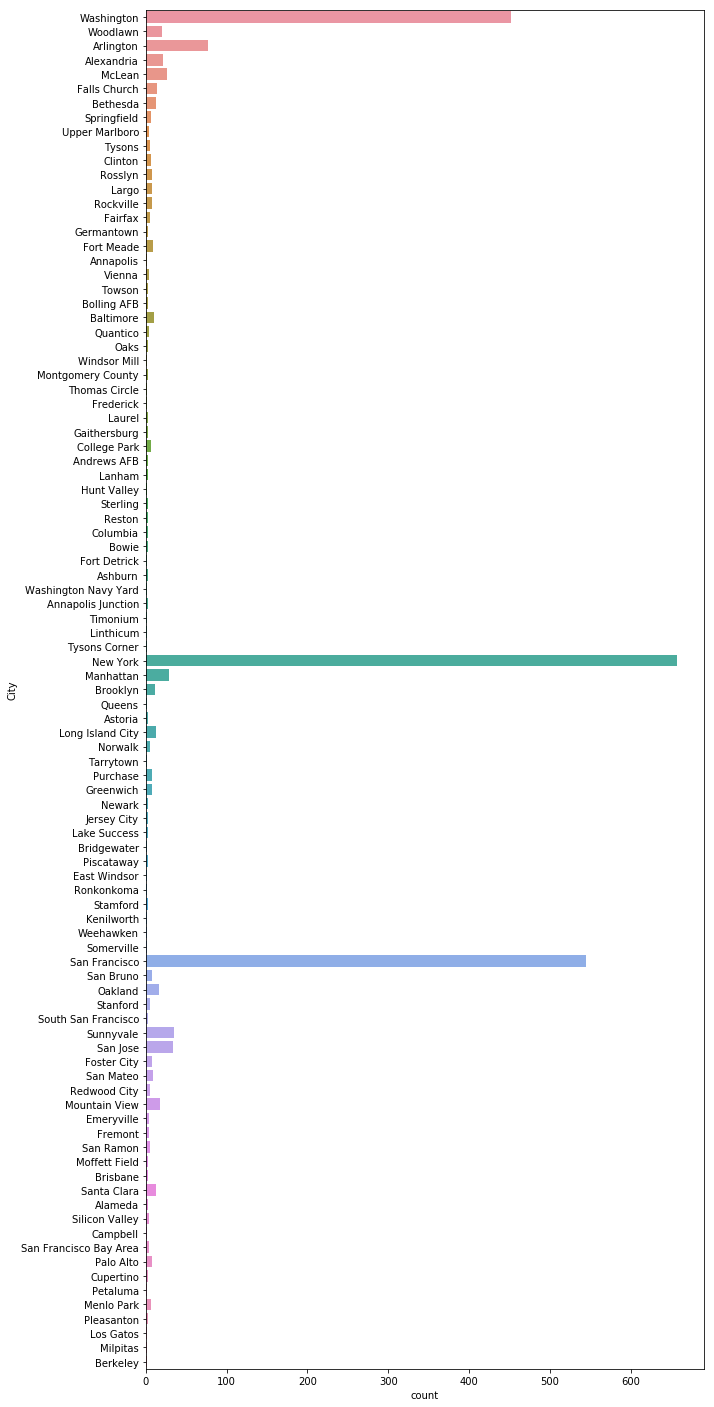

In [17]:
plt.figure(figsize=(10,25))
sns.countplot(y='City', data= Analyst)

#### 2.3 Company

In [18]:
Analyst_dummies_company = pd.get_dummies(Analyst['Company'])
#Adding the dummies_company to the dataset
Analyst = pd.concat([Analyst, Analyst_dummies_company], axis=1)



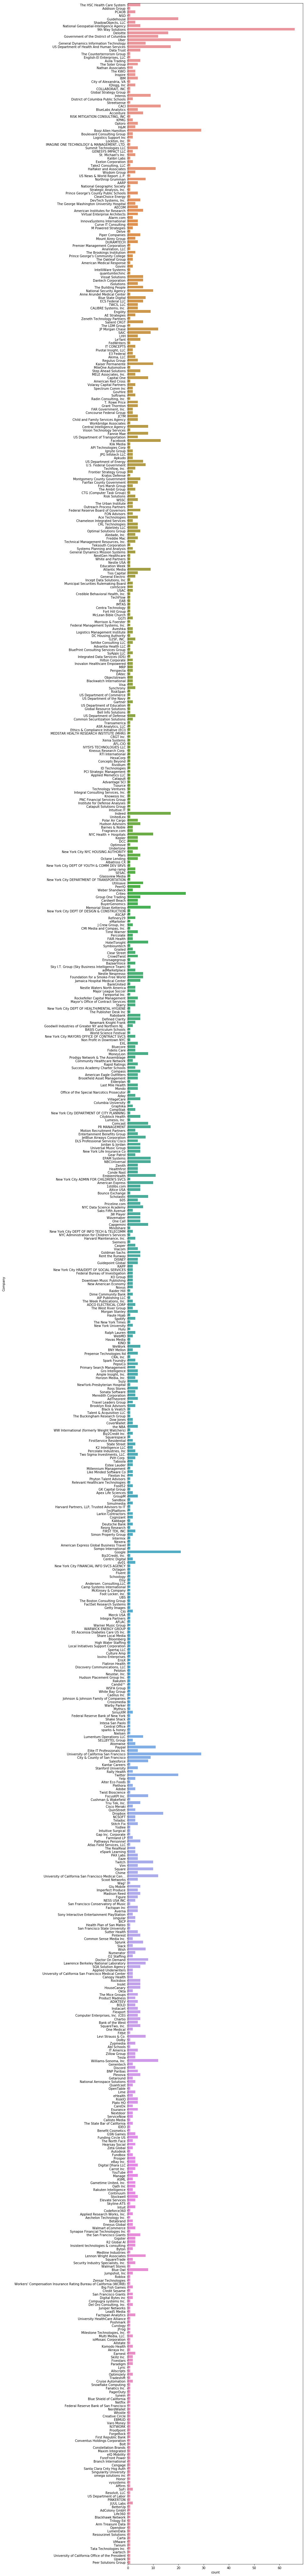

In [19]:
plt.figure(figsize=(10,150))
sns.countplot(y='Company', data= Analyst)

In [20]:
Analyst.shape


(2250, 842)

In [21]:
Analyst.head()

,Unnamed: 0,Company,Level,Location,Salary,Title,City,State,Classify_salary,Entry_level,...,omega solutions inc,quantumtechinc,singular,sparks & honey,the NBA,the San Francisco Giants,tunein,vysystems,xiartech,Data Trust
0,0,The HSC Health Care System,entry_level,"Washington, DC",60000.0,Junior Data Analyst,Washington,DC,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Addison Group,entry_level,"Washington, DC 20003 (Capitol Hill area)",60000.0,Reports Analyst,Washington,DC 20003 (Capitol Hill area),0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,PCAOB,entry_level,"Washington, DC",60000.0,Research Analyst,Washington,DC,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,NSD,entry_level,"Washington, DC 20036 (Downtown area)",60000.0,Data Analyst,Washington,DC 20036 (Downtown area),0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,Guidehouse,entry_level,"Washington, DC",60000.0,Data Analyst - Experienced Associate,Washington,DC,0,1,...,0,0,0,0,0,0,0,0,0,0


### make a copy from final dataframe 

In [22]:
import copy 
DA = copy.deepcopy(Analyst)

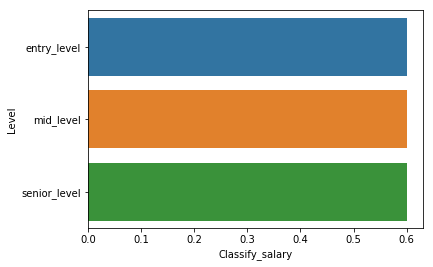

In [23]:
#plotting mean salary for each group of level
mean_level = Analyst[['Level','Classify_salary']].groupby(['Level'], as_index=False).mean()
sns.barplot(y='Level', x= 'Classify_salary' , data = mean_level)

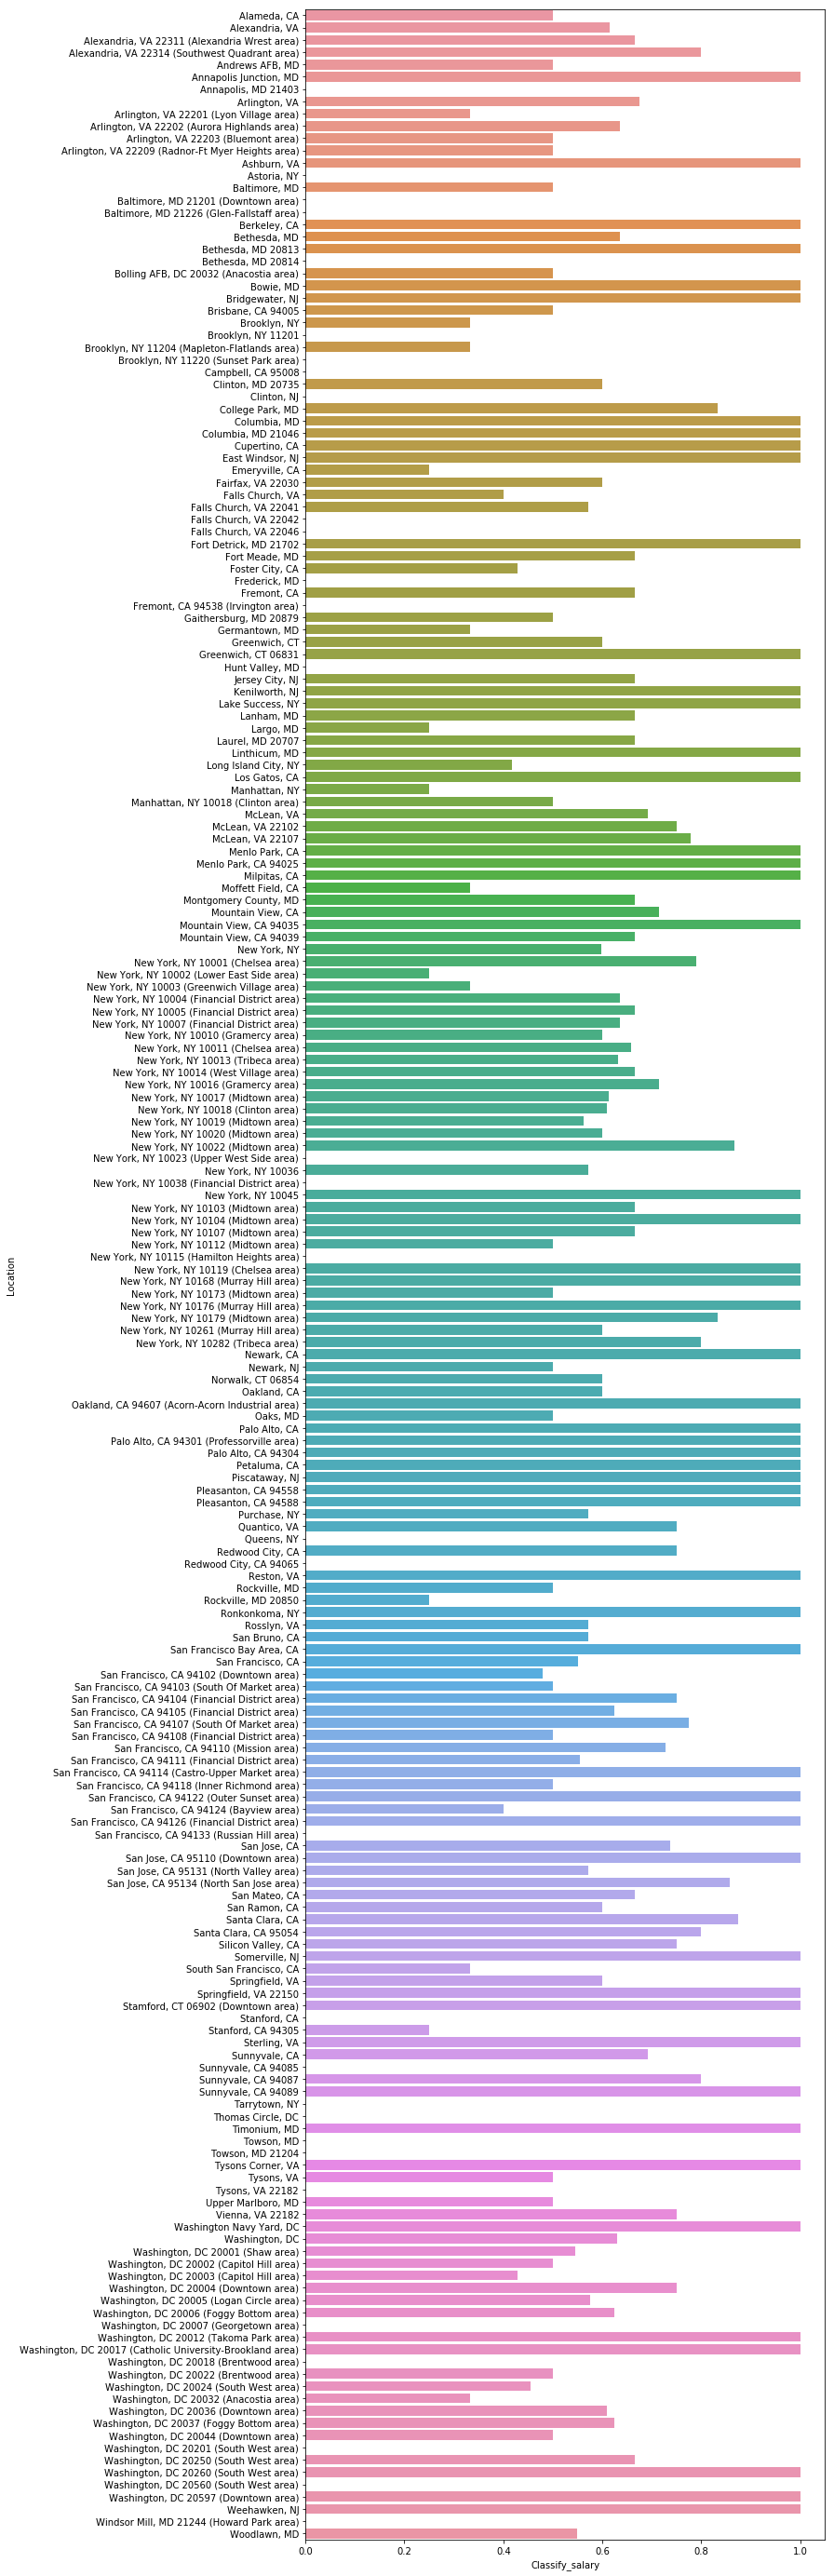

In [24]:
#plotting mean salary for each group of location
mean_location = Analyst[['Location','Classify_salary']].groupby(['Location'], as_index= False).mean()
plt.figure(figsize=(10,50))
sns.barplot(y='Location', x='Classify_salary', data= mean_location)

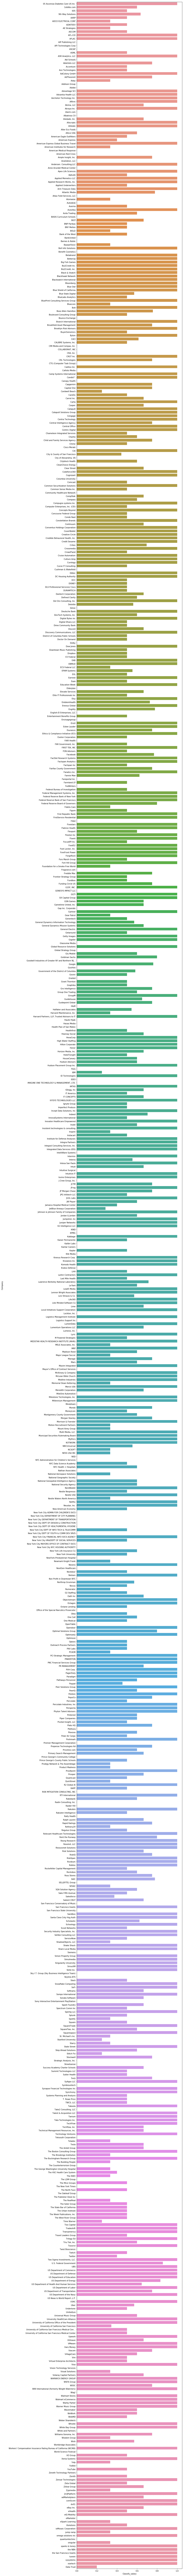

In [25]:
#plotting mean salary for each group of company
mean_company = Analyst[['Company','Classify_salary']].groupby(['Company'], as_index= False).mean()
plt.figure(figsize=(10,250))
sns.barplot(y='Company',x='Classify_salary', data= mean_company)

## 3. Model Prediction

In here, I used random forest, Count Vectorizer, logistic regression, and K-Nearest Neighbors to predict the salary based on doffent features. at the end we will evaluate which model is the best for our purpose.

In [26]:
import copy
X_ana = copy.deepcopy(Analyst)

In [27]:
X_ana

,Unnamed: 0,Company,Level,Location,Salary,Title,City,State,Classify_salary,Entry_level,...,omega solutions inc,quantumtechinc,singular,sparks & honey,the NBA,the San Francisco Giants,tunein,vysystems,xiartech,Data Trust
0,0,The HSC Health Care System,entry_level,"Washington, DC",60000.0,Junior Data Analyst,Washington,DC,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Addison Group,entry_level,"Washington, DC 20003 (Capitol Hill area)",60000.0,Reports Analyst,Washington,DC 20003 (Capitol Hill area),0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,PCAOB,entry_level,"Washington, DC",60000.0,Research Analyst,Washington,DC,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,NSD,entry_level,"Washington, DC 20036 (Downtown area)",60000.0,Data Analyst,Washington,DC 20036 (Downtown area),0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,Guidehouse,entry_level,"Washington, DC",60000.0,Data Analyst - Experienced Associate,Washington,DC,0,1,...,0,0,0,0,0,0,0,0,0,0
5,5,"ShadowObjects, LLC",entry_level,"Washington, DC 20201 (South West area)",60000.0,Acquisition Data Analyst,Washington,DC 20201 (South West area),0,1,...,0,0,0,0,0,0,0,0,0,0
6,6,National Geospatial-Intelligence Agency,entry_level,"Woodlawn, MD",60000.0,Data Analyst - Pay Band 3,Woodlawn,MD,0,1,...,0,0,0,0,0,0,0,0,0,0
7,7,9th Way Solutions,entry_level,"Washington, DC 20005 (Logan Circle area)",60000.0,Research Analyst (Entry Level),Washington,DC 20005 (Logan Circle area),0,1,...,0,0,0,0,0,0,0,0,0,0
8,8,Deloitte,entry_level,"Washington, DC",60000.0,"Analyst, Strategy and Research",Washington,DC,0,1,...,0,0,0,0,0,0,0,0,0,0
9,9,Government of the District of Columbia,entry_level,"Washington, DC",60000.0,Program Analyst,Washington,DC,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#importing libraries
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


C:\Users\shpir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 3.1. Location-random forest

In [29]:
#setting X and y
X = Analyst_dummies_location
y = Analyst['Classify_salary']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)
rfc = RandomForestClassifier(n_estimators=500, random_state=90)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=90, verbose=0, warm_start=False)

In [31]:
rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
acc

0.5814266487213997

In [32]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

In [33]:
feature_importances.sort_values('importance', ascending=False).head(15)

,feature,importance
43,Manhattan,0.071226
68,San Francisco,0.052284
15,Brooklyn,0.043381
70,San Jose,0.032804
8,Baltimore,0.028685
85,Towson,0.021742
31,Germantown,0.021638
38,Largo,0.021551
7,Astoria,0.021425
64,Rockville,0.021167


### 3.2. Title-count vectorizer

In [34]:
#importing libraries
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
#setting x and y
X = Analyst['Title']
y = Analyst['Classify_salary']

In [36]:
count_vec = CountVectorizer(stop_words='english')
count_vec.fit(X)
X_tr = pd.DataFrame(count_vec.transform(X).todense(), columns=count_vec.get_feature_names())
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.33, random_state=99)

In [37]:
rfc = RandomForestClassifier(300, random_state=90)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
acc

0.522207267833109

In [38]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_tr.columns).reset_index()
feature_importances.columns = ['feature', 'importance']
feature_importances.sort_values('importance', ascending=False).head(15)

,feature,importance
148,data,0.038470
43,analyst,0.031753
480,senior,0.026681
79,business,0.023435
472,scientist,0.022476
45,analytics,0.019376
503,sr,0.015184
428,quantitative,0.014499
368,operations,0.013830
446,research,0.012978


### 3.3. Combining features-Logistic regression


In [39]:
#only keeping dummies
X_ana.drop(['Company','Location', 'Title', 'Salary', 'Level', 'City', 'State', 'Classify_salary'], axis=1, inplace=True)


In [40]:
#setting x and y
X = X_ana
Y = Analyst['Classify_salary']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=99)
x_train.size

1256838

In [42]:
#importing libraries
from sklearn.linear_model import LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

C:\Users\shpir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\shpir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [54]:
logreg = LogisticRegressionCV()
cvs = [1, 2, 3, 5, 10, 15, 20]
#instantiate the grid for CV 
grid = GridSearchCV(estimator=logreg, param_grid=dict(cv=cvs))
grid

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'cv': [1, 2, 3, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [43]:
logreg = LogisticRegressionCV(cv=5)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [44]:
acc = accuracy_score(y_test, y_pred)
acc

0.5895020188425303

### 3.4. Combining features-K_Nearest neighbors

In [45]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier()
k_range = [1, 5, 10, 30, 50, 75, 100, 200, 250]

In [47]:
grid = GridSearchCV(estimator = knn, param_grid= dict(n_neighbors=k_range), cv = 10, scoring='accuracy')
grid_coeff = grid.fit(x_train, y_train)

In [48]:
grid.best_score_


0.6051758460517584

In [49]:
grid.best_params_

{'n_neighbors': 100}

In [50]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [55]:
from sklearn import metrics
y_pred_classifier = knn.predict(x_test)
acc= metrics.accuracy_score(y_test, y_pred_classifier)
acc

0.6096904441453567